In [24]:
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap

In [10]:
chicagoACC = gpd.read_file("Chicago_Accessibility/Chicago_ACC.shp")

In [11]:
chicagoACC

,id,normal_val,geometry
0,4158,0.929751,"POLYGON ((-87.71312 41.89411, -87.71140 41.896..."
1,4159,0.939799,"POLYGON ((-87.71307 41.88961, -87.71135 41.891..."
2,4156,0.940660,"POLYGON ((-87.71322 41.90312, -87.71150 41.905..."
3,4157,0.944135,"POLYGON ((-87.71317 41.89861, -87.71145 41.900..."
4,4154,0.940660,"POLYGON ((-87.71332 41.91212, -87.71160 41.914..."
...,...,...,...
3274,4149,0.939901,"POLYGON ((-87.71357 41.93464, -87.71185 41.936..."
3275,4146,0.932963,"POLYGON ((-87.71372 41.94815, -87.71200 41.950..."
3276,4147,0.930890,"POLYGON ((-87.71367 41.94364, -87.71195 41.945..."
3277,4144,0.884283,"POLYGON ((-87.71382 41.95715, -87.71210 41.959..."


In [12]:
def classify(a):
    if a >= 0 and a <= 0.2:
        return 0
    elif a > 0.2 and a <= 0.4:
        return 1
    elif a > 0.4 and a <= 0.6:
        return 2
    elif a > 0.6 and a <= 0.8:
        return 3
    else:
        return 4
chicagoACC['category'] = chicagoACC.apply(lambda x: classify(x.normal_val), axis = 1)

In [13]:
chicagoACC

,id,normal_val,geometry,category
0,4158,0.929751,"POLYGON ((-87.71312 41.89411, -87.71140 41.896...",4
1,4159,0.939799,"POLYGON ((-87.71307 41.88961, -87.71135 41.891...",4
2,4156,0.940660,"POLYGON ((-87.71322 41.90312, -87.71150 41.905...",4
3,4157,0.944135,"POLYGON ((-87.71317 41.89861, -87.71145 41.900...",4
4,4154,0.940660,"POLYGON ((-87.71332 41.91212, -87.71160 41.914...",4
...,...,...,...,...
3274,4149,0.939901,"POLYGON ((-87.71357 41.93464, -87.71185 41.936...",4
3275,4146,0.932963,"POLYGON ((-87.71372 41.94815, -87.71200 41.950...",4
3276,4147,0.930890,"POLYGON ((-87.71367 41.94364, -87.71195 41.945...",4
3277,4144,0.884283,"POLYGON ((-87.71382 41.95715, -87.71210 41.959...",4


In [17]:
chicagoACC['category'].value_counts()

4    1297
3    1048
2     462
1     445
0      27
Name: category, dtype: int64

In [18]:
chicagoACC_dissolve = chicagoACC.dissolve(by='category', aggfunc = 'mean')

In [19]:
chicagoACC_dissolve

,geometry,id,normal_val
category,,,
0,"MULTIPOLYGON (((-87.56479 41.64724, -87.56308 ...",3939.962963,0.125733
1,"MULTIPOLYGON (((-87.66897 41.66470, -87.66726 ...",5779.530337,0.327478
2,"MULTIPOLYGON (((-87.59774 41.83622, -87.59602 ...",5211.413420,0.509687
3,"MULTIPOLYGON (((-87.77023 41.86897, -87.76852 ...",4107.917939,0.712875
4,"MULTIPOLYGON (((-87.71410 41.66893, -87.71580 ...",3954.829607,0.639419


In [41]:
# chicagoACC_dissolve = chicagoACC_dissolve.drop(columns=['id'])
chicagoACC_dissolve["category"] = range(0, len(chicagoACC_dissolve))

In [42]:
chicagoACC_dissolve

,geometry,normal_val,category
category,,,
0,"MULTIPOLYGON (((-87.56479 41.64724, -87.56308 ...",0.125733,0
1,"MULTIPOLYGON (((-87.66897 41.66470, -87.66726 ...",0.327478,1
2,"MULTIPOLYGON (((-87.59774 41.83622, -87.59602 ...",0.509687,2
3,"MULTIPOLYGON (((-87.77023 41.86897, -87.76852 ...",0.712875,3
4,"MULTIPOLYGON (((-87.71410 41.66893, -87.71580 ...",0.639419,4


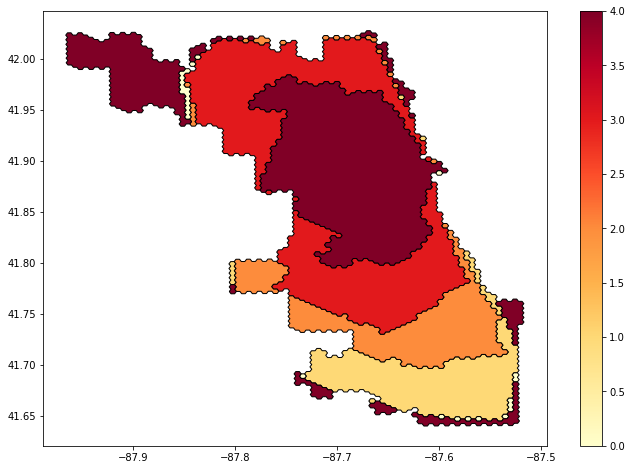

In [45]:
fig, ax = plt.subplots(figsize = (12,8))
chicagoACC_dissolve.plot(column = 'category', edgecolor = "black", cmap='YlOrRd', ax=ax, legend = True)

In [46]:
chicagoACC_dissolve = chicagoACC_dissolve.to_crs({'init': 'epsg:4326'})

In [47]:
chicagoACC_dissolve.to_file("Chicago_ACC_dissolve.geojson", driver="GeoJSON")